In [1]:
import numpy as np
import pandas as pd
from transformers import AutoTokenizer
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
steam_data = pd.read_csv("steam.txt",header=None,names = ["label","document"],delimiter="\t",quoting=3)
steam_data = steam_data.dropna()
steam_data.head()

,label,document
0,0,노래가 너무 적음
1,0,"돌겠네 진짜. 황숙아, 어크 공장 그만 돌려라. 죽는다."
2,1,막노동 체험판 막노동 하는사람인데 장비를 내가 사야돼 뭐지
3,1,차악!차악!!차악!!! 정말 이래서 왕국을 되찾을 수 있는거야??
4,1,시간 때우기에 좋음.. 도전과제는 50시간이면 다 깰 수 있어요


In [5]:
len(steam_data)

100000

In [6]:
tokenizer = AutoTokenizer.from_pretrained("bert-base-multilingual-cased")
bert_token_counts = steam_data["document"].apply(lambda x : len(tokenizer.tokenize(x)))

{'whiskers': [<matplotlib.lines.Line2D at 0x1cfcc07ffc8>,
 'caps': [<matplotlib.lines.Line2D at 0x1cfcc08bd88>,
 'boxes': [<matplotlib.lines.Line2D at 0x1cfcc07fcc8>],
 'medians': [<matplotlib.lines.Line2D at 0x1cfc7d37f48>],
 'fliers': [<matplotlib.lines.Line2D at 0x1cfc7d3dc08>],
 'means': [<matplotlib.lines.Line2D at 0x1cfc7d37ac8>]}

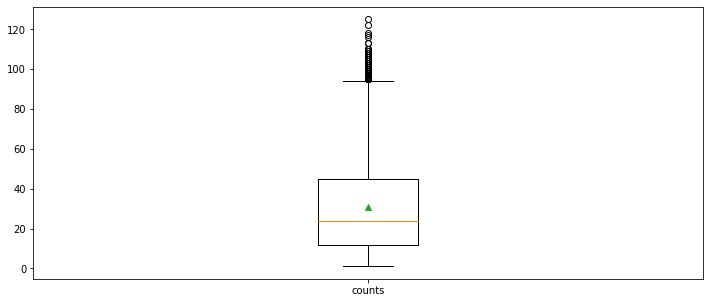

In [7]:
plt.figure(figsize=(12,5))
plt.boxplot(bert_token_counts,labels=["counts"],showmeans=True)

In [9]:
steam_data["document"][:50000].to_csv('steam_data_1.txt', index=False, header=None, sep="\n",encoding="utf-8")
steam_data["document"][50000:].to_csv('steam_data_2.txt', index=False, header=None, sep="\n",encoding="utf-8")